<a href="https://colab.research.google.com/github/Borevi4/Borevi4/blob/main/Big_data_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('u.data.csv', sep='\t', names=('user id', 'movie id', 'rating', 'timestamp'))

In [ ]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
movies = pd.read_csv('u.item.csv', sep='|', names=('movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 
                                                   'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                                                   'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'), encoding = "ISO-8859-1")

In [ ]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
ratings[['user id','rating']].groupby(['user id']).count().sort_values(['rating'], ascending=False).head(3)

,rating
user id,
405,737
655,685
13,636


Пользователь с id 405 поставил больше всего оценок - 737.

In [ ]:
my_ratings = ratings[(ratings['user id']==405)]

In [ ]:
my_ratings = my_ratings.reset_index(drop=True)
my_ratings.head()

,user id,movie id,rating,timestamp
0,405,56,4,885544911
1,405,592,1,885548670
2,405,1582,1,885548670
3,405,171,1,885549544
4,405,580,1,885547447


In [ ]:
my_ratings_count = ratings[['movie id', 'rating']].groupby('movie id').count().rename(columns={'rating' : 'count_of_ratings'}).reset_index()
my_ratings_sum = ratings[['movie id', 'rating']].groupby('movie id').sum().rename(columns={'rating' : 'sum_rating'}).reset_index()

In [ ]:
my_ratings_count.head()

,movie id,count_of_ratings
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86


In [ ]:
my_ratings_sum.head()

,movie id,sum_rating
0,1,1753
1,2,420
2,3,273
3,4,742
4,5,284


In [ ]:
my_ratings = my_ratings[['movie id', 'rating']].join(my_ratings_count.set_index('movie id'), on='movie id', how='left').join(my_ratings_sum.set_index('movie id'), on='movie id', how='left')

In [ ]:
my_ratings = my_ratings.join(movies[['movie id', 'movie title', 'release date', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].set_index('movie id'), on = 'movie id', how='left')

In [ ]:
my_ratings.columns

Index(['movie id', 'rating', 'count_of_ratings', 'sum_rating', 'movie title',
       'release date', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
my_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   movie id          737 non-null    int64 
 1   rating            737 non-null    int64 
 2   count_of_ratings  737 non-null    int64 
 3   sum_rating        737 non-null    int64 
 4   movie title       737 non-null    object
 5   release date      737 non-null    object
 6   Action            737 non-null    int64 
 7   Adventure         737 non-null    int64 
 8   Animation         737 non-null    int64 
 9   Children          737 non-null    int64 
 10  Comedy            737 non-null    int64 
 11  Crime             737 non-null    int64 
 12  Documentary       737 non-null    int64 
 13  Drama             737 non-null    int64 
 14  Fantasy           737 non-null    int64 
 15  Film-Noir         737 non-null    int64 
 16  Horror            737 non-null    int64 
 17  Musical         

In [ ]:
import datetime as dt
my_ratings['release date'] = pd.to_datetime(my_ratings['release date']).dt.year

In [ ]:
my_ratings.head(10)

,movie id,rating,count_of_ratings,sum_rating,movie title,release date,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,56,4,394,1600,Pulp Fiction (1994),1994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,592,1,9,30,True Crime (1995),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1582,1,1,1,T-Men (1947),1947,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,171,1,65,252,Delicatessen (1991),1991,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,580,1,32,108,"Englishman Who Went Up a Hill, But Came Down a...",1995,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1409,1,7,20,"Swan Princess, The (1994)",1994,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,953,3,22,73,Unstrung Heroes (1995),1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,994,1,7,16,"Last Time I Committed Suicide, The (1997)",1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,387,1,65,220,"Age of Innocence, The (1993)",1993,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1432,1,3,3,"Mighty, The (1998)",1998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x, y = my_ratings[['count_of_ratings', 'sum_rating', 'release date', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']], my_ratings[['rating']]

Разделяем выборку на обучающую и тестовую:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Применяем модель Линейную регрессии:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, np.ravel(y_train))

LinearRegression()

In [ ]:
mse(y_train, model.predict(x_train))

1.2284132858740724

In [ ]:
mse(y_test, model.predict(x_test))

1.064424130725633

средляя квадратичная ошибка - 1,06

Применим Дерево решений:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
print(mse(y_train, model_tree.predict(x_train)))
print(mse(y_test, model_tree.predict(x_test)))

0.011035653650254669
2.25


Модель переобучилась. Ограничим глубину дерева, не более 2-х уровней:

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=2)
model_tree.fit(x_train, y_train)
print(mse(y_train, model_tree.predict(x_train)))
print(mse(y_test, model_tree.predict(x_test)))

1.264308962928131
1.313094036127142


средняя квадратичная ошибка - 1,31

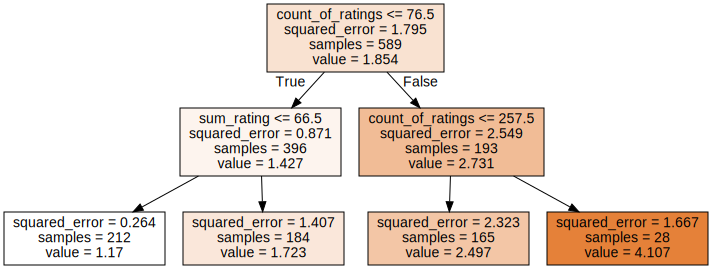

In [ ]:
from sklearn import tree
dot_data=tree.export_graphviz(model_tree, out_file=None, filled=True, feature_names=['count_of_ratings', 'sum_rating', 'release date', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'])
import graphviz
graphviz.Source(dot_data, format="png")

Применим LGBM - регрессию:

In [ ]:
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()
model_lgbm.fit(x_train, y_train)
print(mse(y_train, model_lgbm.predict(x_train)))
print(mse(y_test, model_lgbm.predict(x_test)))

0.5623417673923975
1.324535787370321


средняя квадратичная ошибка: 1,32

Метод опорных векторов:

In [ ]:
from sklearn.svm import SVR
model_svr = SVR()
model_svr.fit(x_train, np.ravel(y_train))
print(mse(y_train, model_svr.predict(x_train)))
print(mse(y_test, model_svr.predict(x_test)))

1.4625089484118774
1.201594419353092


средняя квадратичная ошибка 1,20

Теперь для сравнения проверим, как модели сработают на пользователе с id 655, который тоже сделал много оценок.

In [ ]:
my_ratings_2 = ratings[(ratings['user id']==655)]
my_ratings_2 = my_ratings_2.reset_index(drop=True)
my_ratings_2 = my_ratings_2[['movie id', 'rating']].join(my_ratings_count.set_index('movie id'), on='movie id', how='left').join(my_ratings_sum.set_index('movie id'), on='movie id', how='left')
my_ratings_2 = my_ratings_2.join(movies[['movie id', 'movie title', 'release date', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].set_index('movie id'), on = 'movie id', how='left')
my_ratings_2['release date'] = pd.to_datetime(my_ratings_2['release date']).dt.year
x_2, y_2 = my_ratings_2[['count_of_ratings', 'sum_rating', 'release date', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']], my_ratings_2[['rating']]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.2)
model_svr.fit(x_train_2, np.ravel(y_train_2))
model_lgbm.fit(x_train_2, y_train_2)
model_tree.fit(x_train_2, y_train_2)
model.fit(x_train_2, y_train_2)
print("Метод опорных векторов: ", mse(y_test_2, model_svr.predict(x_test_2)))
print("Метод LGBM: ", mse(y_test_2, model_lgbm.predict(x_test_2)))
print("Метод дерева решений: ", mse(y_test_2, model_tree.predict(x_test_2)))
print("Метод линейной регрессии: ", mse(y_test_2, model.predict(x_test_2)))

Метод опорных векторов:  0.49411302771522536
Метод LGBM:  0.5545630976853365
Метод дерева решений:  0.5524241291404245
Метод линейной регрессии:  0.4466300149492102


Результаты обучения на втором пользователе гораздо лучше.
Метод линейной регрессии снова побеждает с явным преимуществом. Средняя квадратичная ошибка - 0,45


И, чтобы закрепить, пользователь № 13:

In [ ]:
my_ratings = ratings[(ratings['user id']==13)]
my_ratings = my_ratings.reset_index(drop=True)
my_ratings = my_ratings[['movie id', 'rating']].join(my_ratings_count.set_index('movie id'), on='movie id', how='left').join(my_ratings_sum.set_index('movie id'), on='movie id', how='left').join(my_ratings_avg.set_index('movie id'), on='movie id', how='left')
my_ratings = my_ratings.join(movies[['movie id', 'movie title', 'release date', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
                    'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].set_index('movie id'), on = 'movie id', how='left')
my_ratings['release date'] = pd.to_datetime(my_ratings['release date']).dt.year
x, y = my_ratings[['count_of_ratings', 'sum_rating', 'release date', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']], my_ratings[['rating']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model_svr.fit(x_train, np.ravel(y_train))
model_lgbm.fit(x_train, y_train)
model_tree.fit(x_train, y_train)
model.fit(x_train, y_train)
print("Метод опорных векторов: ", mse(y_test, model_svr.predict(x_test)))
print("Метод LGBM: ", mse(y_test, model_lgbm.predict(x_test)))
print("Метод дерева решений: ", mse(y_test, model_tree.predict(x_test)))
print("Метод линейной регрессии: ", mse(y_test, model.predict(x_test)))

Метод опорных векторов:  1.8692217878794606
Метод LGBM:  1.3369680271421864
Метод дерева решений:  1.6413555502246533
Метод линейной регрессии:  1.4542629502363247


В случае с пользователем № 13, наилочший результат показала модель LGBM: средняя квадратичная ошибка - 1,34.